In [1]:
using Pkg
Pkg.add("Polynomials")

    Updating registry at `C:\Users\niczk\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Manifest.toml`


In [2]:
xs =  1:1:10
fx = [rand() for x in xs]
xsf = 1:0.01:10

1.0:0.01:10.0

#### Zadanie 1
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [3]:
# wzór na interpolację Lagrange'a
function Lagrange(x, xs, fx)
    n = length(xs)
    y = 0
    for k = 1:n
        d = 1
        m = 1
        for i = 1:n
            if i != k
                d = d*(x-xs[i])
                m = m*(xs[k]-xs[i])
            end
        end
        L = d/m
        y = y + fx[k]*L
    end
    return y
end

Lagrange (generic function with 1 method)


(process:15876): GLib-GIO-WARNING **: 13:08:32.634: Unexpectedly, UWP app `Microsoft.ZuneVideo_10.22021.10291.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ZuneVideo_8wekyb3d8bbwe!Microsoft.ZuneVideo') supports 33 extensions but has no verbs


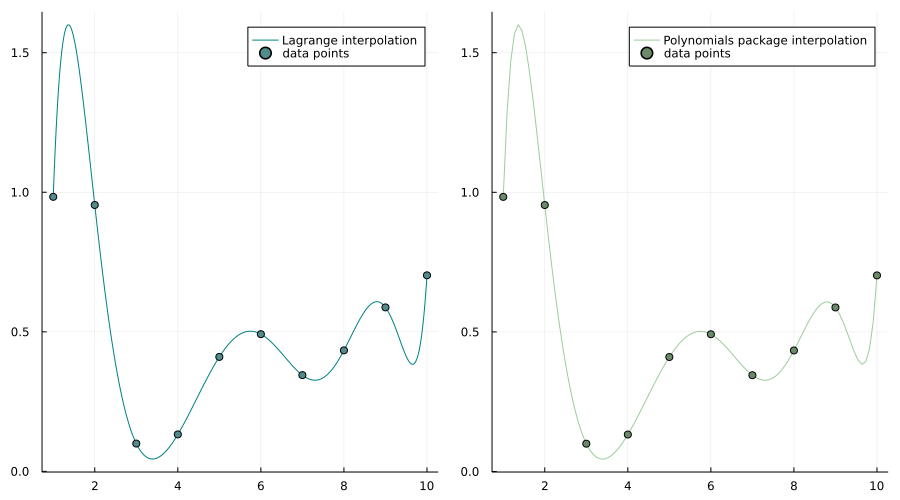

In [4]:
using Plots
using Polynomials

# losowanie przykładowych punktów
xs =  1:1:10
fx = [rand() for x in xs]

# wyliczanie wartości wielomianu Lagrange'a
x = 1:0.01:10
ys = [Lagrange(xi, xs, fx) for xi in x]

# wykres wg wielomianu Lagrange'a
lagrange = plot(x, ys, color=:teal, label = "Lagrange interpolation")
p1 = scatter!(xs, fx, color=:darkslategray4, label = "data points")

# wykres z pakietu Polynomials
f = fit(xs, fx)
plot(f, extrema(xs)..., label="Polynomials package interpolation", color=:darkseagreen3)
p2 = scatter!(xs, fx, label="data points", color=:darkseagreen4)

plot(p1, p2, size=(900, 500))

#### Zadanie 2
1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona

In [5]:
# funkcja tworzy tablicę ilorazów różnicowych i zwraca wektor z wartościami z jej przekątnej jako obiekt newt
function Newton(xs, fx)
    n = length(xs)
    diffs = zeros(Float64, n, n+1)
    fs = []
    
    for i = 1:n
        diffs[i, 1] = xs[i]
        diffs[i, 2] = fx[i]
    end
    
    j = 3
    while j <= n+1
        for i=(j-1):n
            diffs[i, j] = (diffs[i, j-1] - diffs[i-1, j-1])/(xs[i]-xs[i-j+2])
        end
        j += 1
    end
    
    for i=1:n
        push!(fs, diffs[i, i+1])
    end
    
    return fs
end

Newton (generic function with 1 method)

In [6]:
# algorytm Hornera dla postaci Newtona
function NewtHorner(xs, x, newt)
    n = length(newt)
    W = Float64[0 for i in 1:n]
    W[n] = newt[n]
    for i = (n-1):(-1):1
        W[i] = W[i+1]*(x-xs[i])+newt[i]
    end  
    return W[1]
end

NewtHorner (generic function with 1 method)

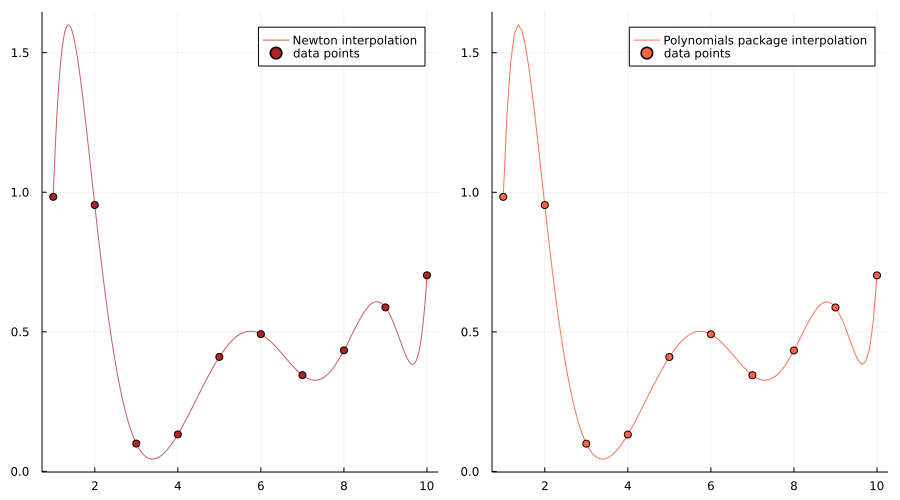

In [7]:
# losowanie przykładowych punktów
# xs =  1:1:10
# fx = [rand() for x in xs]
# xsf = 1:0.01:10

using Interpolations

# wykres wg wielomianu Newtona
newt = Newton(xs, fx)
ysf = [NewtHorner(xs, x, newt) for x in xsf]
newton = plot(xsf,ysf, label="Newton interpolation", color=:indianred)
p1 = scatter!(xs, fx, label = "data points", color=:firebrick)

# wykres z pakietu Polynomials
f = fit(xs, fx)
plot(f, extrema(xs)..., label="Polynomials package interpolation", color=:coral1)
p2 = scatter!(xs, fx, label="data points", color=:tomato)

plot(p1, p2, size=(900, 500))

#### Zadanie 3
Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

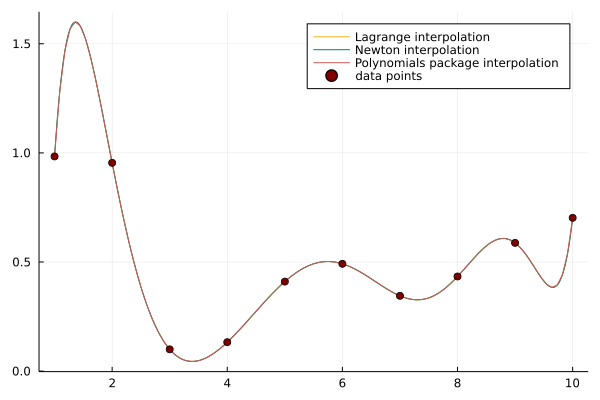

In [8]:
#losowanie przykładowych punktów
# xs = 1:1:10
# fx = [rand() for x in xs]
# xsf = 1:0.01:10

using Interpolations

# Lagrange'a
ls = [Lagrange(x, xs, fx) for x in xsf]
lagrange = plot(x, ls, color=:goldenrod2, label = "Lagrange interpolation")

# Newtona
newt = Newton(xs, fx)
ysf = [NewtHorner(xs, x, newt) for x in xsf]
newton = plot!(xsf,ysf, label="Newton interpolation", color=:teal)

# Polynomials
f = fit(xs, fx)
poly = plot!(f, extrema(xs)..., label="Polynomials package interpolation", color=:indianred)

all = scatter!(xs, fx, color=:maroon, label = "data points")

#### Zadanie 4
Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. Jako narzędzie do analizy danych użyć Julia DataFrames

In [9]:
# cała metoda Newtona do pomiaru czasu
function fullNewton(xs, fx)
    newt = Newton(xs, fx)
    ysf = [NewtHorner(xs, x, newt) for x in xsf]
end

fullNewton (generic function with 1 method)

In [10]:
# cała metoda z pakietu Polynomials do pomiaru czasu
function fullPoly(xs, fx)
    f = fit(xs, fx)
    extrema(xs)
end

fullPoly (generic function with 1 method)

In [11]:
# pojedyncza kompilacja żeby nie zaburzać pomiarów
# xs = 1:1:10
# fx = [rand() for x in xs]
# xsf = 1:0.01:10
[Lagrange(x, xs, fx) for x in xsf]
fullNewton(xs, fx)
fullPoly(xs, fx) 

(1, 10)

In [12]:
# wyliczanie czasów łącznych działań w ramach danej metody
r = 25:25:250
knots = Int64[]
measure = Int64[]
times = Float64[]
method = String[]

for i = r
    xs = 1:1:i
    fx = [rand() for x in xs]
    xsf = 1:0.01:i
    
    for j = 1:3
        for k = 1:10
            if j == 1
                time = @elapsed [Lagrange(x, xs, fx) for x in xsf]
                push!(method, "Lagrange")
            elseif j == 2
                time = @elapsed fullNewton(xs, fx)
                push!(method, "Newton") 
            else
                time = @elapsed fullPoly(xs, fx)    
                push!(method, "Polynomials") 
            end
            push!(knots, i)
            push!(measure, k)
            push!(times, time)
        end
    end
end

In [13]:
using DataFrames
df = DataFrame(knots = knots, 
    measure = measure,
    method = method, 
    time = times)

grouped = groupby(df, [:knots, :method])

using Statistics
stats = combine(grouped, "time" => mean, "time" => std)

,knots,method,time_mean,time_std
,Int64,String,Float64,Float64
1,25,Lagrange,0.0144642,0.0294576
2,25,Newton,0.00469201,0.00039044
3,25,Polynomials,4.42e-6,3.36379e-6
4,50,Lagrange,0.0380482,0.0140412
5,50,Newton,0.0529206,0.0321712
6,50,Polynomials,8.8e-6,2.73089e-6
7,75,Lagrange,0.147512,0.0460861
8,75,Newton,0.0532738,0.00898813
9,75,Polynomials,1.386e-5,3.54689e-6


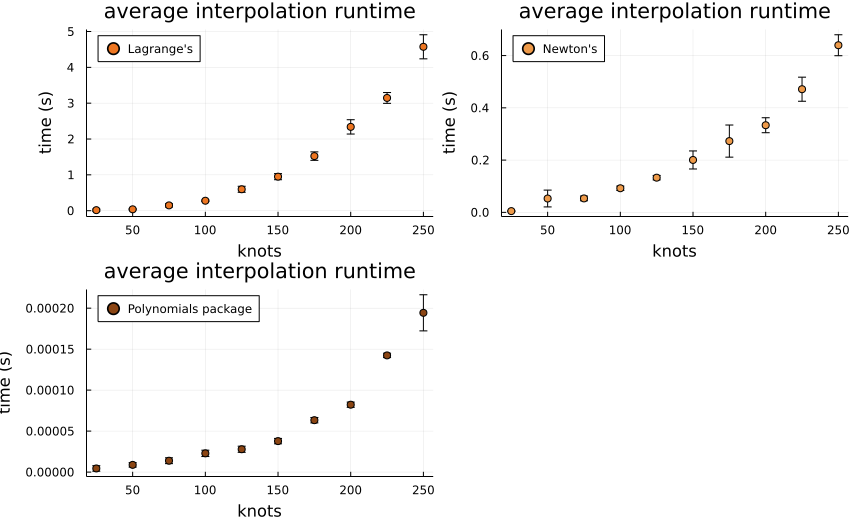

In [14]:
# wykres
using Plots
scatter(stats.knots, stats.time_mean, group=stats.method, 
    title = "average interpolation runtime",
    label = ["Lagrange's" "Newton's" "Polynomials package"], 
    colour = [:chocolate2 :tan2 :saddlebrown], 
    layout=3, 
    yerr=stats.time_std, 
    xlabel="knots", ylabel="time (s)", size=(860, 520), legend=:topleft)

In [15]:
# pojedyncza kompilacja żeby nie zaburzać pomiarów
# xs = 1:1:10
# fx = [rand() for x in xs]
# xsf = 1:0.01:10
newt = Newton(xs, fx)
[NewtHorner(xs, x, newt) for x in xsf]
f = fit(xs, fx)
extrema(xs)  

(1, 250)

In [16]:
# pomiar czasu dla wyliczania wielomianu dla metody Newtona i pakietu Polynomials
r = 25:25:250
knots = Int64[]
measure = Int64[]
times = Float64[]
method = []

for i = r
    xs = 1:1:i
    fx = [rand() for x in xs]
    xsf = 1:0.01:i
    
    for j = 1:2
        for k = 1:10
            if j == 1
                time = @elapsed newt = Newton(xs, fx)
                push!(method, "Newton") 
                push!(times, time)
            else
                time = @elapsed f = fit(xs, fx)
                push!(method, "Polynomials")
                push!(times, time)
            end
            push!(knots, i)
            push!(measure, k)
        end
    end
end

In [17]:
using DataFrames
df_creating = DataFrame(knots = knots, 
    measure = measure,
    method = method,
    time = times)

grouped = groupby(df_creating, [:knots, :method])

using Statistics
stats = combine(grouped, "time" => mean, "time" => std)

,knots,method,time_mean,time_std
,Int64,Any,Float64,Float64
1,25,Newton,4.88e-6,2.46883e-6
2,25,Polynomials,5.63e-6,4.76493e-6
3,50,Newton,1.948e-5,1.78997e-6
4,50,Polynomials,7.61e-6,8.10281e-7
5,75,Newton,4.713e-5,1.17349e-5
6,75,Polynomials,1.611e-5,8.26573e-7
7,100,Newton,7.062e-5,2.21249e-6
8,100,Polynomials,2.544e-5,5.89161e-7
9,125,Newton,0.00013535,2.01857e-5


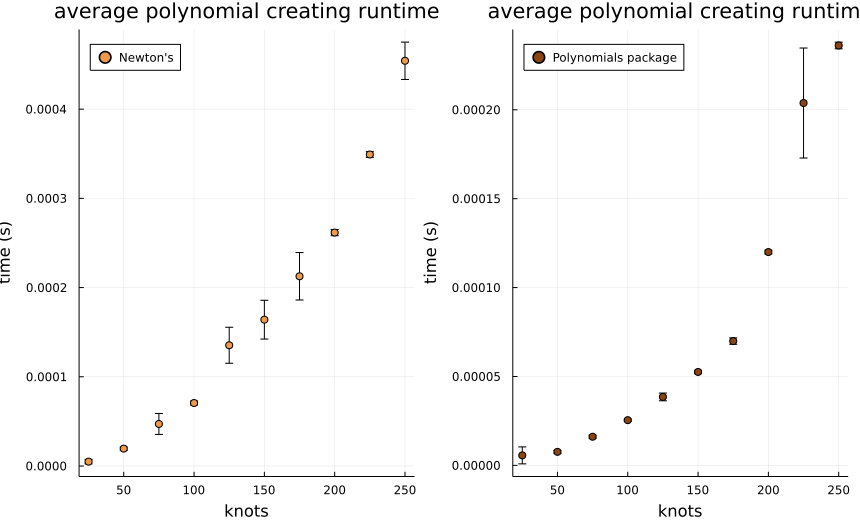

In [18]:
# wykres dla wyliczania wielomianu
using Plots
scatter(stats.knots, stats.time_mean, group=stats.method, 
    title = "average polynomial creating runtime",
    label = ["Newton's" "Polynomials package"], 
    colour = [:tan2 :saddlebrown], 
    layout = 2,
    yerr = stats.time_std, 
    xlabel="knots", ylabel="time (s)", size=(860, 520), legend=:topleft)

In [19]:
# pomiar czasu dla wyliczania punktów dla metody Newtona i pakietu Polynomials
r = 25:25:250
knots = Int64[]
measure = Int64[]
times = Float64[]
method = []

for i = r
    xs = 1:1:i
    fx = [rand() for x in xs]
    xsf = 1:0.01:i
    
    for j = 1:2
        for k = 1:10
            if j == 1
                newt = Newton(xs, fx)
                time = @elapsed ([NewtHorner(xs, x, newt) for x in xsf])
                push!(method, "Newton") 
                push!(times, time)
            else
                f = fit(xs, fx)
                time = @elapsed (extrema(xs))  
                push!(method, "Polynomials")
                push!(times, time)
            end
            push!(knots, i)
            push!(measure, k)
        end
    end
end

In [20]:
using DataFrames
df_creating = DataFrame(knots = knots, 
    measure = measure,
    method = method,
    time = times)

grouped = groupby(df_creating, [:knots, :method])

using Statistics
stats = combine(grouped, "time" => mean, "time" => std)

,knots,method,time_mean,time_std
,Int64,Any,Float64,Float64
1,25,Newton,0.0120665,0.0191724
2,25,Polynomials,8.5e-7,7.94775e-7
3,50,Newton,0.0240932,0.00937031
4,50,Polynomials,7.6e-7,8.23542e-7
5,75,Newton,0.059109,0.0232626
6,75,Polynomials,8.6e-7,9.65171e-7
7,100,Newton,0.0921197,0.023693
8,100,Polynomials,7.2e-7,7.69993e-7
9,125,Newton,0.139776,0.0204806


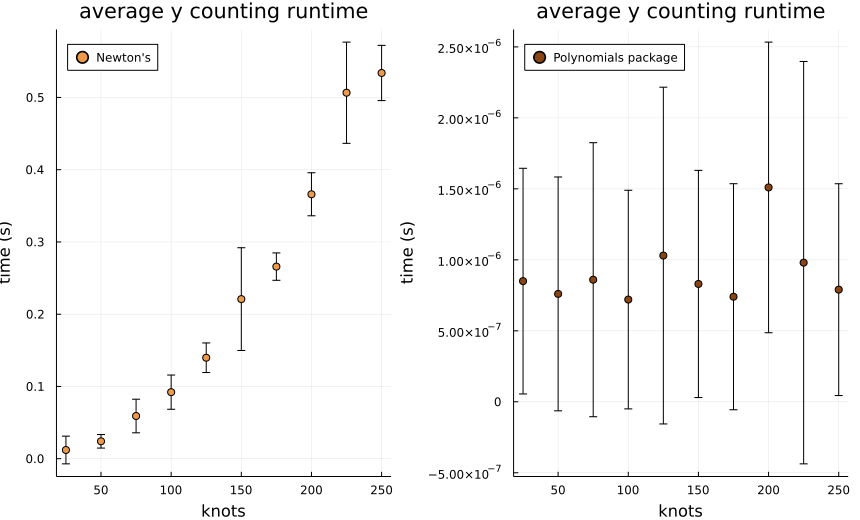

In [21]:
# wykres dla wyliczania punktów
using Plots
scatter(stats.knots, stats.time_mean, group=stats.method, 
    title = "average y counting runtime",
    label = ["Newton's" "Polynomials package"], 
    colour = [:tan2 :saddlebrown], 
    layout = 2,
    yerr = stats.time_std, 
    xlabel="knots", ylabel="time (s)", size=(860, 520), legend=:topleft)

#### Zadanie 5
Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.

In [22]:
# funkcja tworzy tablicę z kolejnymi wartościami wg algorytmu Neville'a
function Neville(x, xs, fx)
    n = length(xs)
    P = zeros(Float64, n, n)
    
    for i = 1:n
        P[i, 1] = fx[i]
    end
    
    j = 2
    while j <= n
        for i = j:n
            P[i, j] = ((x-xs[i])*P[i-1, j-1] - (x-xs[i-j+1])*P[i, j-1])/(xs[i-j+1]-xs[i])
        end
        j += 1
    end
    return P[n, n]
end

Neville (generic function with 1 method)

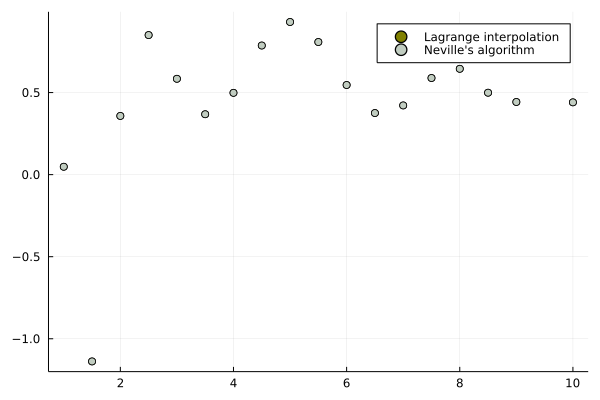

In [23]:
using Interpolations

xs = 1:1:10
fx = [rand() for x in xs]
xsf = 1:0.5:10

# Lagrange'a
ls = [Lagrange(x, xs, fx) for x in xsf]
lagrange = scatter(xsf, ls, label = "Lagrange interpolation", color=:olive)

# Neville'a
nev = [Neville(x, xs, fx) for x in xsf]
neville = scatter!(xsf, nev, label = "Neville's algorithm", color=:honeydew3)

In [24]:
println("Lagrange: ", ls)
println("Neville: ", nev)

Lagrange: [0.048031469366020096, -1.138109571031163, 0.3575427091998371, 0.8502191929558504, 0.5839475364394136, 0.36785037229772144, 0.49835509934078115, 0.7865912004901076, 0.9299226285180218, 0.8079124908650106, 0.5460450503686828, 0.37523593810260664, 0.4215454477067566, 0.5885718475933936, 0.644741808233003, 0.4991332963643751, 0.4425626364310593, 0.845441881823245, 0.4403651745996241]
Neville: [0.048031469366020096, -1.138109571031163, 0.3575427091998371, 0.8502191929558506, 0.5839475364394136, 0.36785037229772144, 0.49835509934078126, 0.7865912004901076, 0.9299226285180217, 0.8079124908650106, 0.5460450503686827, 0.37523593810260675, 0.4215454477067566, 0.5885718475933935, 0.644741808233003, 0.4991332963643752, 0.4425626364310594, 0.8454418818232448, 0.44036517459962415]


#### Zadanie 6 
Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej.

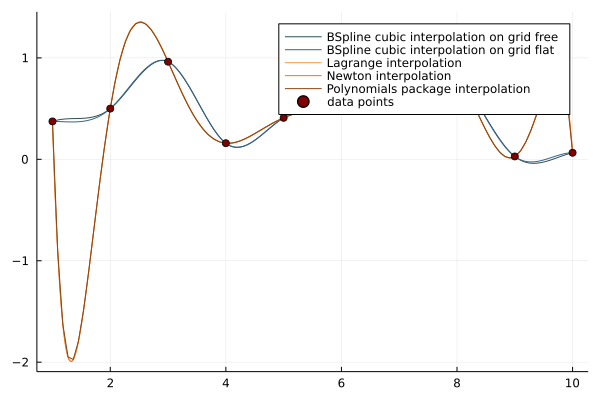

In [25]:
xs = 1:1:10
fx = [rand() for x in xs]
xsf = 1:0.01:10

itp = interpolate(fx, BSpline(Cubic(Free(OnGrid()))))
ysf3 = [itp(x) for x in xsf]
plot(xsf, ysf3, label="BSpline cubic interpolation on grid free", color=:darkslategrey)

itp = interpolate(fx, BSpline(Cubic(Flat(OnGrid()))))
ysf3 = [itp(x) for x in xsf]
plot!(xsf, ysf3, label="BSpline cubic interpolation on grid flat", color=:steelblue4)

# Lagrange'a
ls = [Lagrange(x, xs, fx) for x in xsf]
lagrange = plot!(xsf, ls, label = "Lagrange interpolation", color=:tan2)

# Newtona
newt = Newton(xs, fx)
ysf = [NewtHorner(xs, x, newt) for x in xsf]
newton = plot!(xsf, ysf, label="Newton interpolation", color=:chocolate2)

# Polynomials
f = fit(xs, fx)
poly = plot!(f, extrema(xs)..., label="Polynomials package interpolation", color=:chocolate4)

all = scatter!(xs, fx, color=:maroon, label = "data points", size(900, 800), legend=:best)